### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-12/02/20
#### Clasificacion de imagenes motoras en EEG con LSTM o GRU
##### Caracteristicas = RWE-DWT
##### 5 ejecuciones independientes

#### LSTM
##### Sujeto 1
##### Accuracy = 51.39%
##### Kappa = 0.3519

#### GRU
##### Sujeto 1
##### Accuracy = 53.12%
##### Kappa = 0.3750

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 3))
x_test = x_test.reshape((n_samples_test, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3)
(288, 22, 3)


In [11]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


In [0]:
def RNN_LSTM():
  model = Sequential()
  model.add(LSTM(256, input_shape=x_train.shape[1:]))
  model.add(Dense(n_classes, activation='softmax'))
    
  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
def RNN_GRU():
  model = Sequential()
  model.add(GRU(64, input_shape=x_train.shape[1:]))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 - 0s - loss: 1.3448 - acc: 0.4931
kappa:  0.32407407407407407
f1: 0.48973725273670055
confusion matrix:
 [[33 31  6  2]
 [16 50  5  1]
 [18  5 29 20]
 [21  6 15 30]]


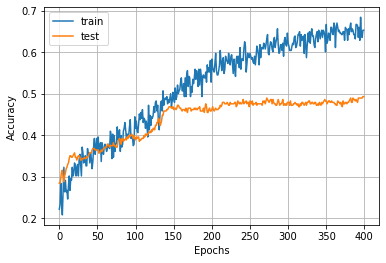

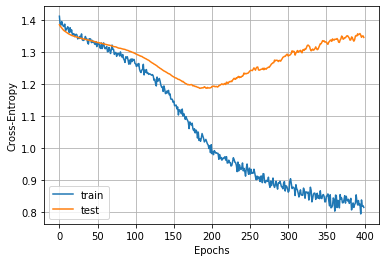

Iteration: 2
288/288 - 0s - loss: 1.3128 - acc: 0.4861
kappa:  0.31481481481481477
f1: 0.48665983180751116
confusion matrix:
 [[31 33  6  2]
 [19 47  5  1]
 [19  2 31 20]
 [21  4 16 31]]


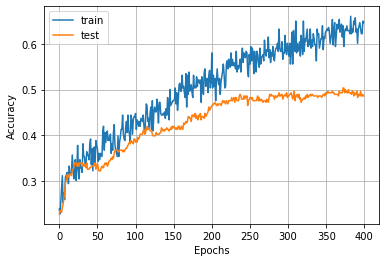

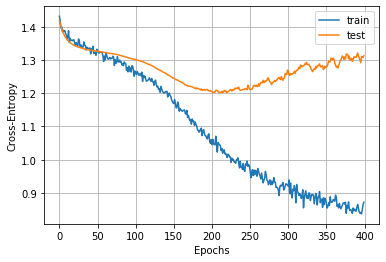

Iteration: 3
288/288 - 0s - loss: 1.2496 - acc: 0.4965
kappa:  0.3287037037037037
f1: 0.49324174889808076
confusion matrix:
 [[30 34  5  3]
 [17 50  4  1]
 [16  6 30 20]
 [16  6 17 33]]


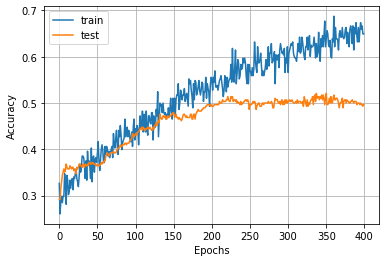

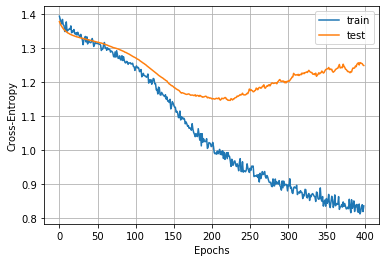

Iteration: 4
288/288 - 0s - loss: 1.1704 - acc: 0.5069
kappa:  0.34259259259259256
f1: 0.5040134786061681
confusion matrix:
 [[27 36  6  3]
 [14 52  5  1]
 [17  3 33 19]
 [19  3 16 34]]


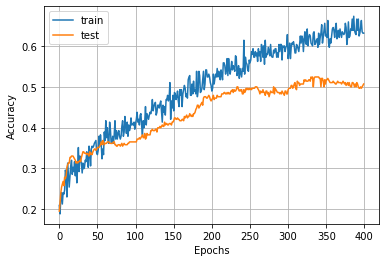

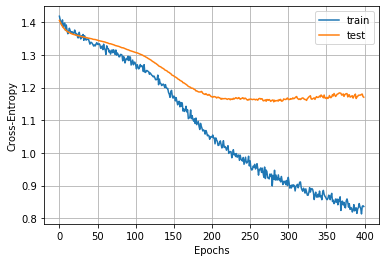

Iteration: 5
288/288 - 0s - loss: 1.2275 - acc: 0.5312
kappa:  0.375
f1: 0.5265517552180762
confusion matrix:
 [[33 30  6  3]
 [13 54  4  1]
 [16  4 35 17]
 [17  6 18 31]]


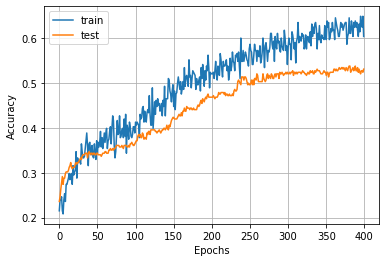

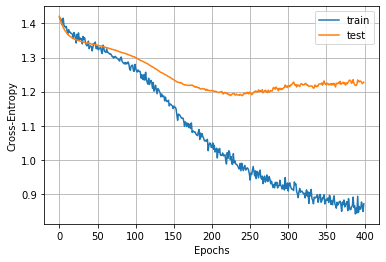


Resultados:
loss: [1.3448275460137262, 1.3127526972028944, 1.2496003574795194, 1.1703606049219768, 1.227480623457167]
accuracy: [0.49305555, 0.4861111, 0.4965278, 0.5069444, 0.53125]
kappa: [0.32407407407407407, 0.31481481481481477, 0.3287037037037037, 0.34259259259259256, 0.375]
f1: [0.48973725273670055, 0.48665983180751116, 0.49324174889808076, 0.5040134786061681, 0.5265517552180762]


In [14]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = RNN_GRU()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 64)                16704     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 16,964
Trainable params: 16,964
Non-trainable params: 0
_________________________________________________________________


In [16]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.5028
Mean Kappa: 0.3370
Mean F1: 0.5000
Max Accuracy: 0.5312
Max Kappa: 0.3750
Max F1: 0.5266
